In [1]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

from random import randint
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
import copy
import seaborn as sns

In [3]:
X = load_boston().data
Y = load_boston().target

In [415]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=0.3)

In [416]:
scaler = preprocessing.StandardScaler()
train_x = scaler.fit_transform(train_x)

In [417]:
test_x = scaler.transform(test_x)

In [418]:
clf = SGDRegressor()
clf.fit(train_x, train_y)
err_sklearn = mean_squared_error(test_y, clf.predict(test_x))
err_sklearn

31.414334127079375

In [17]:
def squared_loss(w, b, x, y):
    error = 0
    for idx, pt in enumerate(x):
        error += (y[idx] - (np.dot(w, pt) + b)) ** 2
    return error/len(x)

In [359]:
def stochastic_gradient_descent(learning_rate, w_i, b_i, x_train, y_train, x_test, y_test):
    n_iters = 500
    partial_w = partial_b = 0
    error_train = []
    error_test = []
    w_old = w_i
    b_old = b_i
    for i in range(n_iters):
        n_samples = randint(1, x_train.shape[0])
        x_t = copy.deepcopy(x_train[:n_samples])
        y_t = copy.deepcopy(y_train[:n_samples])
        for idx, x_i in enumerate(x_t):
            partial_w += (-2) * (x_i * (y_t[idx] - (np.dot(w_i.T, x_i) + b_i)))
            partial_b += (-2) * (y_t[idx] - (np.dot(w_i.T, x_i) + b_i))
        w_i = w_i - (learning_rate * partial_w)
        b_i = b_i - (learning_rate * partial_b)
        error_train.append(squared_loss(w_i, b_i, x_t, y_t))
        error_test.append(squared_loss(w_i, b_i, copy.deepcopy(x_test), copy.deepcopy(y_test)))
        if (w_old==w_i).all():
            break
        else:
            w_old = w_i
            b_old = b_i
            learning_rate = learning_rate/2
    return w_i, b_i, error_train, error_test

In [384]:
learning_rate = 0.001
argmin_w, argmin_b, err_train, err_test = stochastic_gradient_descent(
    learning_rate, np.random.rand(13), np.random.rand(), copy.deepcopy(train_x), copy.deepcopy(train_y), 
    copy.deepcopy(test_x), copy.deepcopy(test_y)
)

In [385]:
# calculating error after finding best w and b with 0.001 learning rate
err = squared_loss(argmin_w, argmin_b, test_x, test_y)
print("Mean squared error for implemented SGD:", err)

Mean squared error for implemented SGD: 31.855944205120863


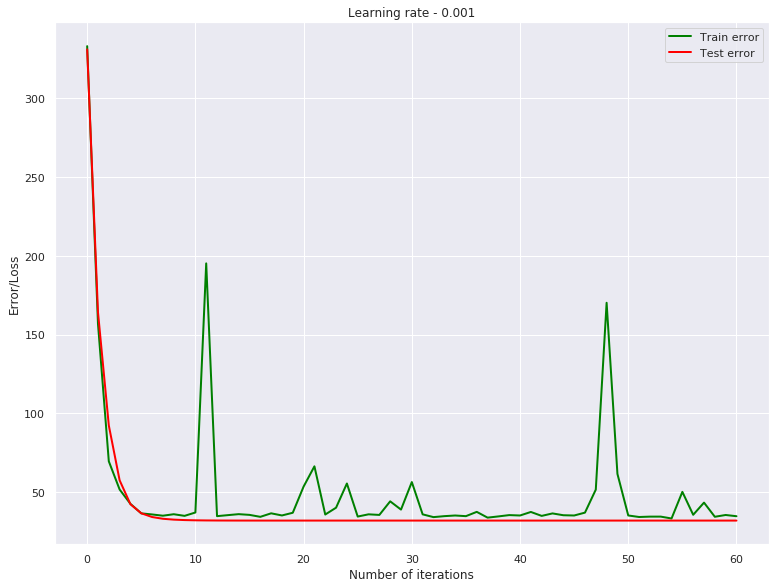

In [419]:
# plot
plt.figure(figsize=(12.8, 9.6))
plt.plot(range(len(err_train)), err_train, color='green', lw=2, label='Train error')
plt.plot(range(len(err_test)), err_test, color='red', lw=2, label='Test error')
plt.xlabel('Number of iterations')
plt.ylabel('Error/Loss')
plt.legend(loc="upper right")
plt.title("Learning rate - " + str(learning_rate))
plt.show()

## Comparision between sklearn SGD and implemented SGD

In [420]:
print("learning rate:", learning_rate)
print("Best w and b for implemented SGD")
print(argmin_w, argmin_b)
print("Best w and b for sklearn SGD")
print(clf.coef_, clf.intercept_ )

learning rate: 0.001
Best w and b for implemented SGD
[-0.50707667  0.93414535 -0.7277074   2.24137686  0.7535107   5.35651085
  0.30003053 -0.7927732   1.44487067 -0.39847494 -2.05223414  0.56677801
 -3.01447871] 20.575396280626315
Best w and b for sklearn SGD
[-0.8002963   0.58168229 -0.42087045  0.31752383 -0.60699617  2.55571388
 -0.0845171  -2.01814541  0.88852337 -0.53966271 -1.82999692  1.0435854
 -3.46824096] [21.46640724]


In [421]:
print("Mean squared error for implemented SGD:", err)
print("Mean squared error for sklearn SGD:", err_sklearn)

Mean squared error for implemented SGD: 31.855944205120863
Mean squared error for sklearn SGD: 31.414334127079375


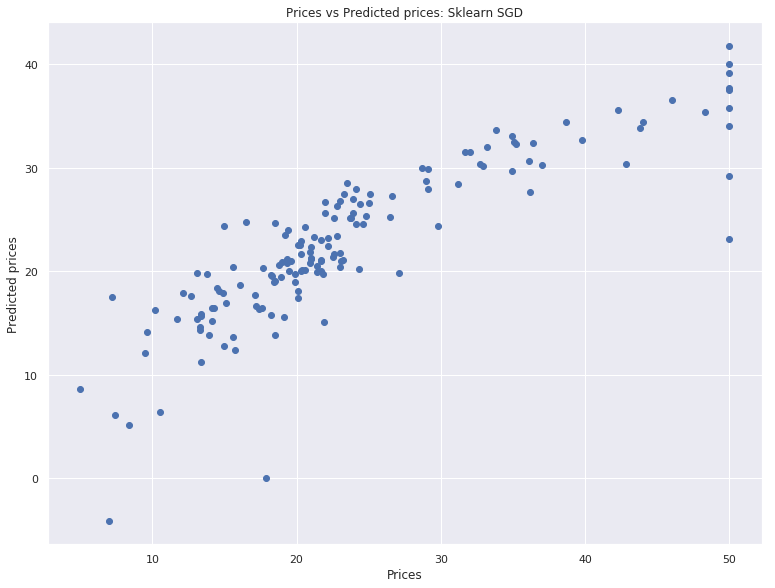

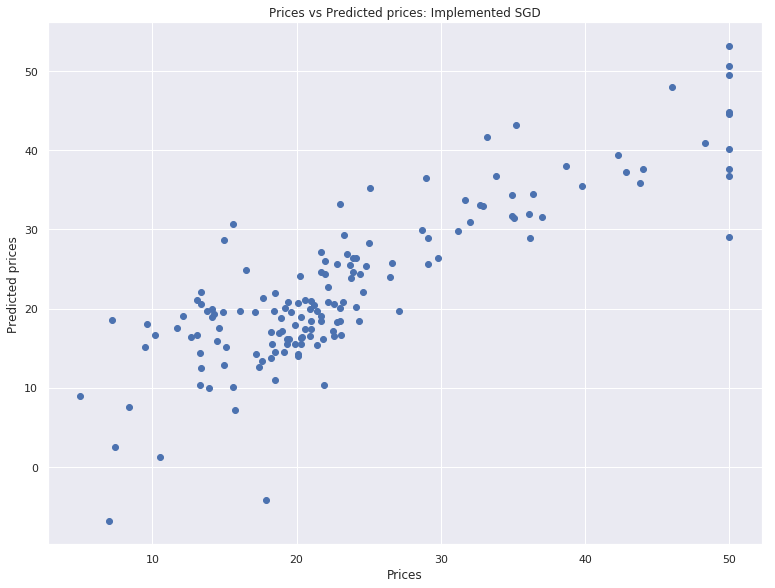

In [422]:
# Scatter plot of test vs predicted
# sklearn SGD
plt.figure(figsize=(12.8, 9.6))
plt.scatter(test_y, clf.predict(test_x))
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices: Sklearn SGD")
plt.show()

# Implemented SGD
plt.figure(figsize=(12.8, 9.6))
plt.scatter([test_y], [(np.dot(test_x, argmin_w) + argmin_b)])
plt.xlabel("Prices")
plt.ylabel("Predicted prices")
plt.title("Prices vs Predicted prices: Implemented SGD")
plt.show()

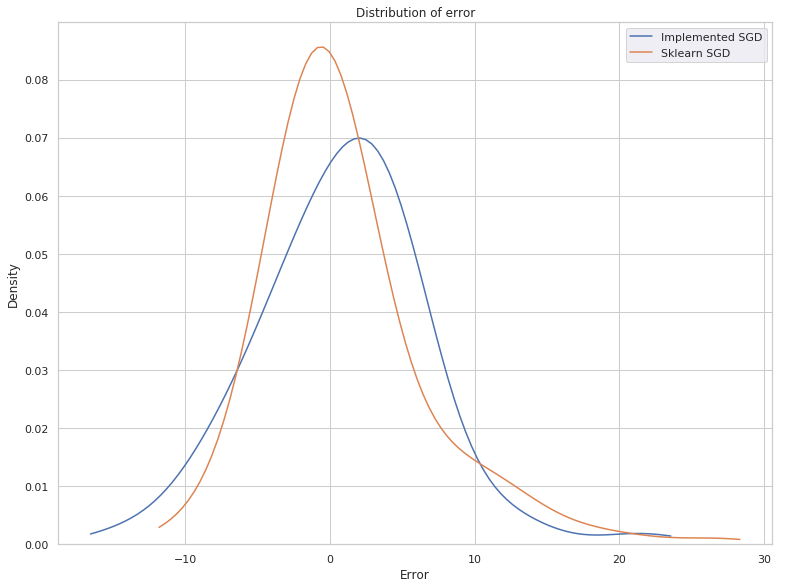

In [423]:
# Distribution of error
delta_impl = test_y - (np.dot(test_x, argmin_w) + argmin_b)
delta_sk = test_y - clf.predict(test_x)
sns.set_style('whitegrid')
sns.kdeplot(delta_impl, label = "Implemented SGD", bw = 0.5)
sns.kdeplot(delta_sk, label = "Sklearn SGD", bw = 0.5)
plt.title("Distribution of error")
# plt.figure(figsize=(12.8, 9.6))
sns.set(rc={'figure.figsize':(12.8, 9.6)})
plt.xlabel("Error")
plt.ylabel("Density")
plt.legend()
plt.show()